In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
from datetime import datetime
import math 
import statistics
from scipy import stats
from pprint import pprint #formats json

In [2]:
belize_listings_path = "belize_airbnb_listings.csv"
belize_df = pd.read_csv(belize_listings_path)
belize_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.747860,-88.023980,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.748320,-88.024740,Entire home/apt,71,3,316,2/19/2021,2.46,5,164
2,108932,Purple House eco solar w/ ocean & wildlife views,563377,Michael,Belize,Belize Islands,17.732210,-88.038240,Entire home/apt,191,2,30,3/14/2020,0.78,1,364
3,110483,Michelo's fuchsia suite,567809,Michel,Stann Creek,Stann Creek Mainland,16.521140,-88.369260,Hotel room,121,1,27,2/24/2020,0.29,3,331
4,120115,Seaside Villas Second Floor Unit #4,604999,Bobbi,Belize,Belize Islands,17.741660,-88.023950,Entire home/apt,343,1,30,3/18/2020,0.64,22,203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2791,48283996,Magical Island,17994012,Ronald,Belize,Belize Islands,17.945690,-87.944620,Entire home/apt,1054,3,0,NaN,NaN,2,347
2792,48287613,"The Luxury Suite - Corozal, Bz- 3Bdr/2bthr CASA1",375769845,Michael,Corozal,Corozal,18.374630,-88.400190,Entire home/apt,401,3,0,NaN,NaN,2,302
2793,48296096,Lagoon front apartment w/shared pool - two mi...,76414486,Vacasa Belize,Belize,Belize Islands,17.934580,-87.955220,Entire home/apt,252,1,0,NaN,NaN,204,364
2794,48296978,Beachfront Poolside Condo,15308338,Alexandra,Belize,Belize Islands,17.930010,-87.957120,Entire home/apt,242,3,0,NaN,NaN,4,364


#### 1.Create two histograms in a subplot (vertical or horizontal is fine) that show the distribution of reviews_per_month and number_of_reviews in Belize Airbnb datta

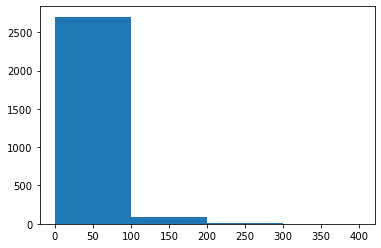

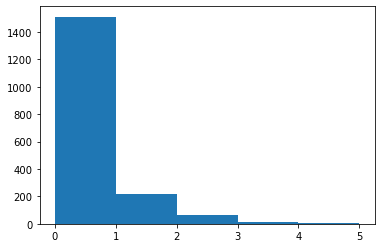

In [42]:
bins = [0, 100, 200, 300, 400]
plt.hist(belize_df['number_of_reviews'], bins = bins)
plt.show()
bins = [0, 1, 2, 3, 4, 5]
plt.hist(belize_df['reviews_per_month'], bins = bins)
plt.show()

In [ ]:
 the bin values divide the entire range of values into a series of intervals
     and then count how many values fall into each interval.
    The bins are usually specified as consecutive, non-overlapping intervals of a variable.
    In number_of_review column values r not more than 400 and in reviews_per_month column values are not more than 5.

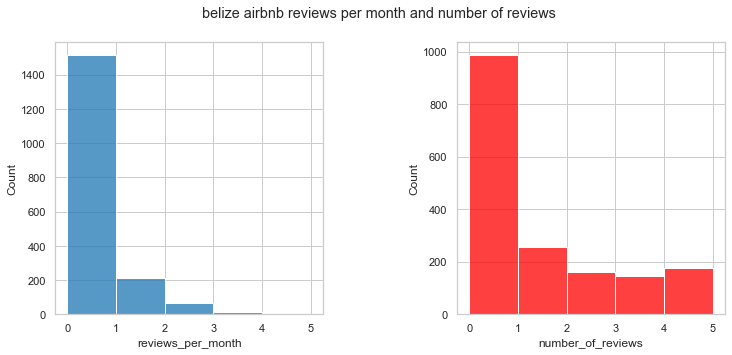

In [56]:
sns.set_style('whitegrid')
sns.set_context('notebook')
fig, axes = plt.subplots(1, 2, figsize = (12,5))
fig.suptitle('belize airbnb reviews per month and number of reviews')
plt.subplots_adjust(wspace = 0.5)

ax = sns.histplot(ax=axes[0], data = belize_df['reviews_per_month'], bins = bins)
ax.setxlabel = ('reviews per month')
ax = sns.histplot(ax=axes[1], data = belize_df['number_of_reviews'], bins = bins, color = 'r');
ax.setxlabel = ('number of reviews');

#### 2.Create a box and whisker plot for availability_365. What does this show you?

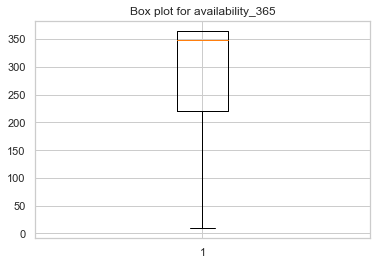

In [69]:
fig, ax = plt.subplots()
ax.boxplot(belize_df['availability_365'], notch = False, showfliers = False) #showfliers : Show the outliers beyond the caps
ax.set_title("Box plot for availability_365")
plt.show()

In [ ]:
here lowest data point shows 0 and highest data point is 365
everything falls between 1 to 365
so its been observed that most of the data lies in 0 to 350 and very less data plotted between 350 to 365

#### 3.What is the probability that the price for an Airbnb is under $50.

In [6]:
a = belize_df.loc[belize_df['price']<= 50]
a.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
134,4005831,"Home away from home, Shared dormitory, NO AC",9315171,Julia,Belize,Belize Mainland,17.51482,-88.22233,Private room,20,1,2,3/1/2020,0.03,10,365
148,4304743,"DORMITORY Bed #1 of 6, on Maya Ruin",2084006,Lower Dover,Cayo,Cayo,17.21379,-88.94974,Shared room,36,1,1,2/10/2020,0.08,4,365
172,4936432,"Home away from home, Shared dormitory, NO AC",9315171,Julia,Belize,Belize Mainland,17.51426,-88.22121,Shared room,20,1,16,2/4/2020,0.24,10,365
189,5509363,"Yaxche Jungle Camp, Dormitory",6960726,Yaxche Jungle Camp,Cayo,Cayo,17.15125,-88.66244,Shared room,24,1,30,2/25/2020,0.42,2,365
196,5717367,Comfortable and Ecological Camping,29641332,Minerva,Cayo,Cayo,17.05410,-89.11378,Entire home/apt,30,1,6,10/16/2017,0.09,1,365


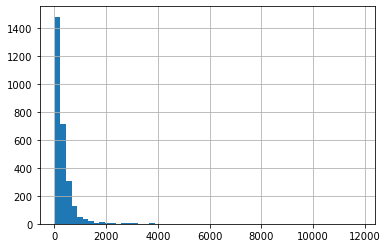

1.7525035765379111


In [9]:
belize_df['price'].hist(bins = 55)
plt.show()

prob = len(belize_df[belize_df['price'] < 50])/len(belize_df) * 100
print(prob)


#### .What distribution does this data most closely fit?

In [ ]:
right skewed

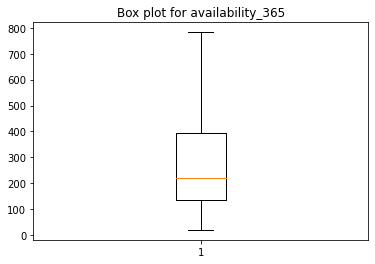

In [23]:
fig, ax = plt.subplots()
ax.boxplot(belize_df['price'], notch = False, showfliers = False) #showfliers : Show the outliers beyond the caps
ax.set_title("Box plot for availability_365")
plt.show()

In [ ]:
there is very less probability that the price for an Airbnb is under $50.


#### 4.Calculate the sample variance and standard deviation for all the numerical columns in the same output. 
a.Why sample variance and not population variance?

b.What is your takeaway for each metric?

c.What are the scales of measurement for each of these values? 

In [75]:
belize_df[['price' , 'minimum_nights' , 'number_of_reviews' , 'reviews_per_month' , 'calculated_host_listings_count' ,'availability_365']].var(ddof=1)

price                             317109.568066
minimum_nights                        32.147122
number_of_reviews                    919.773508
reviews_per_month                      0.438448
calculated_host_listings_count      2674.046405
availability_365                   14548.613157
dtype: float64

In [76]:
belize_df[['price' , 'minimum_nights' , 'number_of_reviews' , 'reviews_per_month' , 'calculated_host_listings_count' ,'availability_365']].std(ddof=1)

price                             563.124825
minimum_nights                      5.669843
number_of_reviews                  30.327768
reviews_per_month                   0.662154
calculated_host_listings_count     51.711183
availability_365                  120.617632
dtype: float64

In [ ]:
Standard deviation looks at how spread out a group of numbers is from the mean,
by looking at the square root of the variance.
The variance measures the average degree to which each point differs from the mean—the average of all data points.

 A population is defined as all members. Population is the whole group.
    A sample is a part of a population that is used to describe the characteristics (e.g. mean or standard deviation) of
    the whole population.
    The size of a sample can be less than 1%, or 10%, or 60% of the population, but it is never the whole population.
 a. sample variance Because it is not the entire population
 c.interval scales of measurement for each of these values. 

#### 5.What percent of Airbnb listings in Belize are available 360 days a year or more?

#### a.360 days or less?

In [ ]:
360 days or less is 61.55221745350501 percent

#### b.What distribution does this data most closely fit?

In [ ]:
on observing the data it fits in left skewed.

360 days or more is 39.52074391988555
360 days or less is 61.55221745350501


<AxesSubplot:>

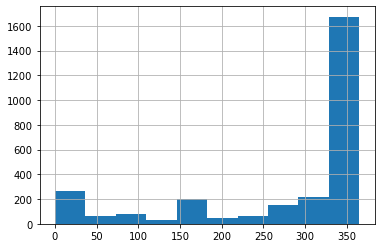

In [4]:
more_prob = len(belize_df[belize_df['availability_365'] >= 360])/len(belize_df) *100
print ('360 days or more is ' + str(more_prob))

less_prob = len(belize_df[belize_df['availability_365'] <= 360])/len(belize_df) *100
print ('360 days or less is ' + str(less_prob))

        
belize_df['availability_365'].hist()

#### 6.What minimum night count are 75% of Airnbnb listing in Belize greater than?

In [18]:
 belize_df['minimum_nights'].describe()

count    2796.000000
mean        2.263948
std         5.669843
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       180.000000
Name: minimum_nights, dtype: float64

In [20]:
stats.norm.cdf(2.2, 5.6)#cumulative distribution function

0.0003369292656768814

In [35]:
stats.norm.ppf((1-0.75),2.26,5.6)#percent point function

-1.5171426010980573

In [27]:
belize= belize_df.groupby('neighbourhood_group')
a =belize['minimum_nights'].mean()
a
print(a.quantile(.75))

2.6531593406593403


In [ ]:
2.6 percent count data of minimum nights  in belize is greater than 75%